New notebook to differentiate the EDA from further work.

In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

Read in the csv files

In [2]:
derecho_calls = pd.read_csv('../data/911_Phone Calls_Derecho_050320 050420.csv')
derecho_computer = pd.read_csv('../data/Computer Aided Dispatch Data_Derecho Incidents 050320-050420.csv',
                               skiprows = 3)
tornado_calls = pd.read_csv('../data/911_Phone_Calls_Tornado_030320.csv')
tornado_computer = pd.read_csv('../data/Computer Aided Dispatch Data_Tornado Incidents 030320.csv', skiprows = 3)

Changing the column names for derecho calls.

In [3]:
derecho_calls = derecho_calls.rename(columns = {'ALI Latitude' : 'lat',
                                                'ALI Longitude' : 'lng', 'Cell Tower Address' : 'tower'})
derecho_calls.head()

,Seizure DateTime,CallTypeId,lat,lng,tower
0,5/3/2020 16:30,911 Calls,36.247802,-86.716847,WIRELESS CALLER
1,5/3/2020 16:30,911 Calls,36.143108,-86.800621,1161 21ST AV S - SE
2,5/3/2020 16:30,911 Calls,36.100516,-87.056329,8013 C MCCRORY LN - N
3,5/3/2020 16:30,911 Calls,36.130021,-86.927819,5758 RIVER RD - SW
4,5/3/2020 16:31,911 Calls,36.142380,-86.881882,3744B ANNEX AVE - SE


In [4]:
derecho_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Seizure DateTime  1549 non-null   object 
 1   CallTypeId        1549 non-null   object 
 2   lat               1483 non-null   float64
 3   lng               1483 non-null   float64
 4   tower             1525 non-null   object 
dtypes: float64(2), object(3)
memory usage: 60.6+ KB


Converting Seizure DateTime datatype from object to datetime.

In [47]:
derecho_calls['Seizure DateTime2'] = pd.to_datetime(derecho_calls['Seizure DateTime'])
derecho_calls['Time'] = derecho_calls['Seizure DateTime2'].apply( lambda d : d.time())
#assert derecho_calls['Seizure DateTime2'].dtype == 'datetime64[ns]'
#derecho_calls['Time'].astype('datetime64')
derecho_calls.head(2)
derecho_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Seizure DateTime   1549 non-null   object        
 1   CallTypeId         1549 non-null   object        
 2   lat                1483 non-null   float64       
 3   lng                1483 non-null   float64       
 4   tower              1525 non-null   object        
 5   Seizure DateTime2  1549 non-null   datetime64[ns]
 6   Time               1549 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 84.8+ KB


Plotting derecho_calls to establish the end of the initial event and where late calls begin.

<ipython-input-58-58bc8ebb0f8c>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['1700', '1800', '1900', '2000', '2100', '2200', '2300', '0000']);


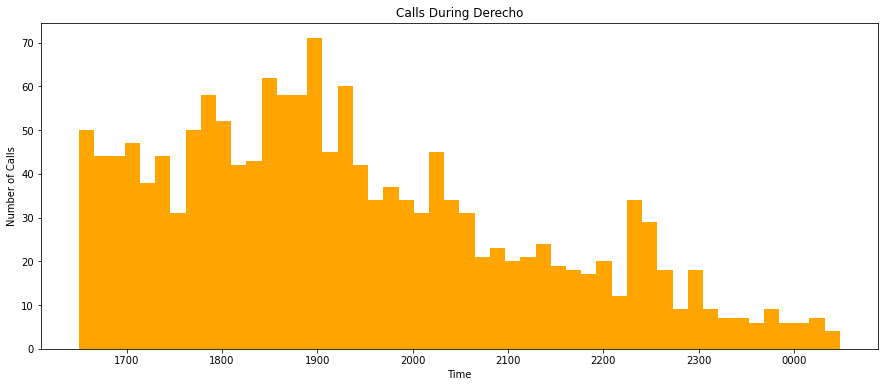

In [58]:
fig, ax = plt.subplots(figsize = (15, 6))
#plt.figure(figsize = (15, 6))
ax.hist(derecho_calls['Seizure DateTime2'], bins = 50, color = 'orange')
ax.set_ylabel('Number of Calls')
ax.set_xlabel('Time')
ax.set_title('Calls During Derecho')
ax.set_xticklabels(['1700', '1800', '1900', '2000', '2100', '2200', '2300', '0000']);
#ticks = ['1700', '1800', '1900', '2000', '2100', '2200', '2300', '0000']
#plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7], labels = ticks);

It appears that the late calls begin to increase slightly after 8 pm.

Subsetting the derecho_calls DataFrame by Seizure DateTime2 for all calls on or after 8 pm.

In [7]:
derecho_sw = derecho_calls[derecho_calls['Seizure DateTime2'] >= '2020-05-03 20:00:00']
derecho_sw.head(2)

,Seizure DateTime,CallTypeId,lat,lng,tower,Seizure DateTime2,Time
1042,5/3/2020 20:00,911 Calls,36.151339,-86.872737,WIRELESS CALLER,2020-05-03 20:00:00,20:00:00
1043,5/3/2020 20:00,911 Calls,36.049168,-86.690798,WIRELESS CALLER,2020-05-03 20:00:00,20:00:00


In [8]:
derecho_sw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507 entries, 1042 to 1548
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Seizure DateTime   507 non-null    object        
 1   CallTypeId         507 non-null    object        
 2   lat                494 non-null    float64       
 3   lng                494 non-null    float64       
 4   tower              507 non-null    object        
 5   Seizure DateTime2  507 non-null    datetime64[ns]
 6   Time               507 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 31.7+ KB


Renaming tornado_calls columns.

In [9]:
tornado_calls = tornado_calls.rename(columns = {'ALI Latitude' : 'lat', 
                                                'ALI Longitude': 'lng', 'Cell Tower Address' : 'tower'})
tornado_calls.head(2)

,Seizure DateTime,CallTypeId,lat,lng,tower
0,3/3/2020 0:34,911 Calls,36.072708,-86.665779,620 Richards RD - N Sector
1,3/3/2020 0:36,911 Calls,36.159634,-86.841904,4507D KENTUCKY AV - SE


In [10]:
tornado_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Seizure DateTime  475 non-null    object 
 1   CallTypeId        475 non-null    object 
 2   lat               450 non-null    float64
 3   lng               450 non-null    float64
 4   tower             468 non-null    object 
dtypes: float64(2), object(3)
memory usage: 18.7+ KB


Converting Seizure DateTime datatype to datetime.

In [11]:
tornado_calls['Seizure DateTime2'] = pd.to_datetime(tornado_calls['Seizure DateTime'])
assert tornado_calls['Seizure DateTime2'].dtype == 'datetime64[ns]'
tornado_calls.head(2)

,Seizure DateTime,CallTypeId,lat,lng,tower,Seizure DateTime2
0,3/3/2020 0:34,911 Calls,36.072708,-86.665779,620 Richards RD - N Sector,2020-03-03 00:34:00
1,3/3/2020 0:36,911 Calls,36.159634,-86.841904,4507D KENTUCKY AV - SE,2020-03-03 00:36:00


Plotting tornado_calls to see if there is a time to establish the start of late calls.

<ipython-input-61-37f149a2126c>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0030', '0100', '0130', '0200', '0230', '0300', '0330', '0400', '0430', '0500']);


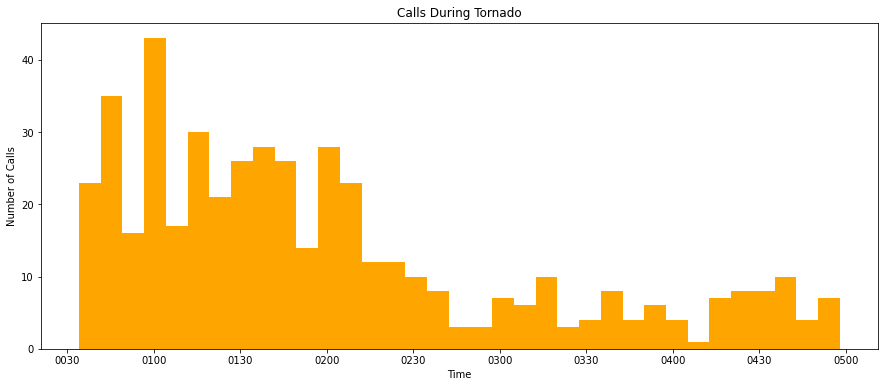

In [61]:
fig, ax = plt.subplots(figsize = (15, 6))
#plt.figure(figsize = (15, 6))
ax.hist(tornado_calls['Seizure DateTime2'], bins = 35, color = 'orange')
ax.set_ylabel('Number of Calls')
ax.set_xlabel('Time')
ax.set_title('Calls During Tornado')
ax.set_xticklabels(['0030', '0100', '0130', '0200', '0230', '0300', '0330', '0400', '0430', '0500']);



# plt.figure(figsize = (15, 6))
# plt.hist(tornado_calls['Seizure DateTime2'], bins = 35, color = 'orange')
# plt.ylabel('Number of Calls')
# plt.xlabel('Date and Time')
# plt.title('Calls During Tornado');

It appears that the late calls begin around 2 am.

Subsetting tornado_calls by Seizure DateTime2 for all calls on or after 2 am.

In [13]:
tornado_sw = tornado_calls[tornado_calls['Seizure DateTime2'] >= '2020-03-03 02:00:00']
tornado_sw.head(2)

,Seizure DateTime,CallTypeId,lat,lng,tower,Seizure DateTime2
292,3/3/2020 2:00,911 Calls,36.154633,-86.78450,PRELIM 1033 DEMONBREUN ST - SE Sector,2020-03-03 02:00:00
293,3/3/2020 2:00,911 Calls,36.182045,-86.74927,WIRELESS CALLER,2020-03-03 02:00:00


In [14]:
tornado_sw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 292 to 474
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Seizure DateTime   183 non-null    object        
 1   CallTypeId         183 non-null    object        
 2   lat                170 non-null    float64       
 3   lng                170 non-null    float64       
 4   tower              183 non-null    object        
 5   Seizure DateTime2  183 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 10.0+ KB


In [15]:
# Pull in zipcodes to add zip column to dataframes
zipcodes = gpd.read_file('../data/zipcodes.geojson')
zipcodes = zipcodes [['zip', 'po_name', 'geometry']]
print(zipcodes.shape)
print(zipcodes.crs)
zipcodes.head( )

(56, 3)
epsg:4326


,zip,po_name,geometry
0,37115,MADISON,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,NASHVILLE,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,NASHVILLE,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,BRENTWOOD,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,FRANKLIN,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [16]:
# Convert IncidentDate to datetime datatype.
tornado_computer['IncidentDate'] = pd.to_datetime(tornado_computer['IncidentDate'])

In [17]:
# Slice the dataframe by the late calls cutoff time.
tornado_computer = tornado_computer[tornado_computer['IncidentDate'] >= '03/03/2020 02:00:00']
tornado_computer.head()

,IncidentDate,Location,Latitude1,Longitude1,IncidentTypeDescription1
129,2020-03-03 02:01:33,1421 WOODLAND ST,36.177240,-86.743885,SMOKE DETECTOR ALARM HOUSE
130,2020-03-03 02:01:52,2658 BARCLAY DR,36.174243,-86.719824,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD
131,2020-03-03 02:02:32,S 9TH ST / MAIN ST,36.175964,-86.757246,OUTSIDE NATURAL GAS ODOR COMMERCIAL LINE TANK ...
132,2020-03-03 02:03:06,111 EVANDER ST,36.175976,-86.740844,OUTSIDE ODOR
133,2020-03-03 02:04:00,938 W EASTLAND AV,36.184138,-86.754363,OUTSIDE ODOR


In [18]:
# Value counts to show top 5 incident types for tornado.
tcadd_incidents = tornado_computer.value_counts('IncidentTypeDescription1').head()

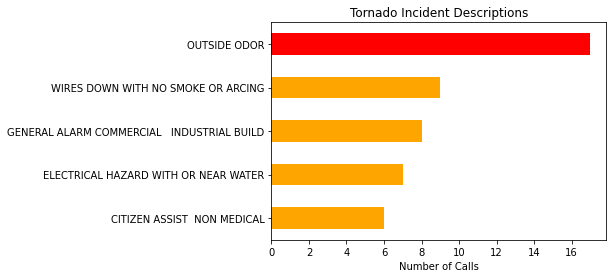

In [38]:
tcadd_incidents.sort_values().plot.barh('tcadd_incidents', 
                             color=['orange','orange','orange','orange', 'red'])
plt.ylabel(None)
plt.xlabel('Number of Calls')
plt.title('Tornado Incident Descriptions');

In [20]:
#change cadd tornado dataset to geo:
tornado_computer['geometry'] = tornado_computer.apply(lambda x: Point((float(x.Longitude1),
                                                         float(x.Latitude1))),
                                        axis=1)
cadd_tornado_geo = gpd.GeoDataFrame(tornado_computer,
                           crs = zipcodes.crs,
                           geometry = tornado_computer['geometry'])
print(cadd_tornado_geo.crs)
cadd_tornado_geo.head(3)

epsg:4326


,IncidentDate,Location,Latitude1,Longitude1,IncidentTypeDescription1,geometry
129,2020-03-03 02:01:33,1421 WOODLAND ST,36.177240,-86.743885,SMOKE DETECTOR ALARM HOUSE,POINT (-86.74389 36.17724)
130,2020-03-03 02:01:52,2658 BARCLAY DR,36.174243,-86.719824,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,POINT (-86.71982 36.17424)
131,2020-03-03 02:02:32,S 9TH ST / MAIN ST,36.175964,-86.757246,OUTSIDE NATURAL GAS ODOR COMMERCIAL LINE TANK ...,POINT (-86.75725 36.17596)


In [21]:
# join geodataframe to zip codes geojson file.
tcadd_zip = gpd.sjoin(cadd_tornado_geo, zipcodes, op = 'within')
print(tcadd_zip.shape)
tcadd_zip.head()

(131, 9)


,IncidentDate,Location,Latitude1,Longitude1,IncidentTypeDescription1,geometry,index_right,zip,po_name
129,2020-03-03 02:01:33,1421 WOODLAND ST,36.177240,-86.743885,SMOKE DETECTOR ALARM HOUSE,POINT (-86.74389 36.17724),13,37206,NASHVILLE
130,2020-03-03 02:01:52,2658 BARCLAY DR,36.174243,-86.719824,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,POINT (-86.71982 36.17424),13,37206,NASHVILLE
131,2020-03-03 02:02:32,S 9TH ST / MAIN ST,36.175964,-86.757246,OUTSIDE NATURAL GAS ODOR COMMERCIAL LINE TANK ...,POINT (-86.75725 36.17596),13,37206,NASHVILLE
132,2020-03-03 02:03:06,111 EVANDER ST,36.175976,-86.740844,OUTSIDE ODOR,POINT (-86.74084 36.17598),13,37206,NASHVILLE
133,2020-03-03 02:04:00,938 W EASTLAND AV,36.184138,-86.754363,OUTSIDE ODOR,POINT (-86.75436 36.18414),13,37206,NASHVILLE


In [22]:
# convert geodataframe back to dataframe for plotting charts.
tcadd_zip = pd.DataFrame(tcadd_zip)

In [23]:
# Count of dispatches by zip code.
tcadd_zipcount = tcadd_zip.zip.value_counts().head(10)
print(tcadd_zipcount)

37206    36
37208    26
37076    17
37214    11
37115     6
37209     6
37207     6
37218     3
37213     3
37205     3
Name: zip, dtype: int64


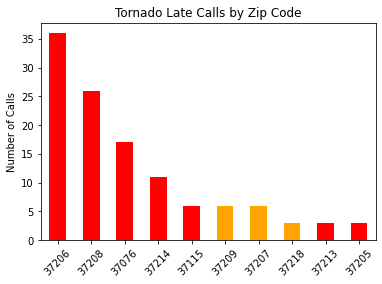

In [24]:
#ax=tcadd_zipcount.plot.bar(x='zip', color = 'orange')

ax=tcadd_zipcount.plot.bar(x='zip', color=['red', 'red','red','red','red','orange','orange','orange','red','red']);
plt.title('Tornado Late Calls by Zip Code')
plt.ylabel('Number of Calls')
plt.xticks(rotation = 45);

In [25]:
derecho_computer['IncidentDate'] = pd.to_datetime(derecho_computer['IncidentDate'])

In [26]:
derecho_computer = derecho_computer[derecho_computer['IncidentDate'] >= '05/03/2020 20:00:00']
derecho_computer.head()

,IncidentDate,Location,Latitude1,Longitude1,IncidentTypeDescription1
408,2020-05-03 20:00:04,487 ELLENWOOD DR,36.058035,-86.733791,ELECTRICAL HAZARD
409,2020-05-03 20:00:32,3531 HUNTLAND DR,36.274720,-86.842008,DIFFICULTY SPEAKING BETWEEN BREATHS
410,2020-05-03 20:00:35,6009 HAWKDALE DR,36.029022,-86.714328,ABNORMAL BREATHING
411,2020-05-03 20:02:45,5017 MAYWOOD DR,36.070287,-86.757398,ELECTRICAL HAZARD
412,2020-05-03 20:03:01,250 NEW SAWYER BROWN RD,36.086361,-86.941623,ELECTRICAL HAZARD


In [42]:
dcadd_incidents = derecho_computer.value_counts('IncidentTypeDescription1').head()

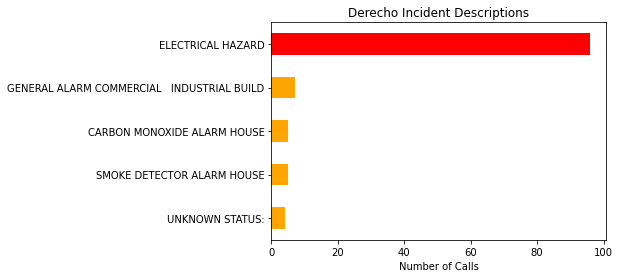

In [43]:
dcadd_incidents.sort_values().plot.barh('dcadd_incidents', 
                             color=['orange','orange','orange','orange', 'red'])
plt.ylabel(None)
plt.xlabel('Number of Calls')
plt.title('Derecho Incident Descriptions');

In [28]:
#change cadd derecho dataset to geo:
derecho_computer['geometry'] = derecho_computer.apply(lambda x: Point((float(x.Longitude1),
                                                         float(x.Latitude1))),
                                        axis=1)
cadd_derecho_geo = gpd.GeoDataFrame(derecho_computer,
                           crs = zipcodes.crs,
                           geometry = derecho_computer['geometry'])
print(cadd_derecho_geo.crs)
cadd_derecho_geo.head(3)

epsg:4326


,IncidentDate,Location,Latitude1,Longitude1,IncidentTypeDescription1,geometry
408,2020-05-03 20:00:04,487 ELLENWOOD DR,36.058035,-86.733791,ELECTRICAL HAZARD,POINT (-86.73379 36.05804)
409,2020-05-03 20:00:32,3531 HUNTLAND DR,36.274720,-86.842008,DIFFICULTY SPEAKING BETWEEN BREATHS,POINT (-86.84201 36.27472)
410,2020-05-03 20:00:35,6009 HAWKDALE DR,36.029022,-86.714328,ABNORMAL BREATHING,POINT (-86.71433 36.02902)


In [29]:
dcadd_zip = gpd.sjoin(cadd_derecho_geo, zipcodes, op = 'within')
print(dcadd_zip.shape)
dcadd_zip.head()

(219, 9)


,IncidentDate,Location,Latitude1,Longitude1,IncidentTypeDescription1,geometry,index_right,zip,po_name
408,2020-05-03 20:00:04,487 ELLENWOOD DR,36.058035,-86.733791,ELECTRICAL HAZARD,POINT (-86.73379 36.05804),49,37211,NASHVILLE
410,2020-05-03 20:00:35,6009 HAWKDALE DR,36.029022,-86.714328,ABNORMAL BREATHING,POINT (-86.71433 36.02902),49,37211,NASHVILLE
411,2020-05-03 20:02:45,5017 MAYWOOD DR,36.070287,-86.757398,ELECTRICAL HAZARD,POINT (-86.75740 36.07029),49,37211,NASHVILLE
423,2020-05-03 20:12:15,5044 MARC DR,36.027227,-86.738349,ELECTRICAL HAZARD,POINT (-86.73835 36.02723),49,37211,NASHVILLE
429,2020-05-03 20:15:24,3933 KEELEY DR,36.066330,-86.697248,INEFFECTIVE BREATHING,POINT (-86.69725 36.06633),49,37211,NASHVILLE


In [30]:
dcadd_zip = pd.DataFrame(dcadd_zip)

In [31]:
dcadd_zipcount = dcadd_zip.zip.value_counts().head(10)
print(dcadd_zipcount)

37211    27
37205    20
37076    18
37013    16
37214    16
37215    13
37207    11
37217    11
37204    11
37203    11
Name: zip, dtype: int64


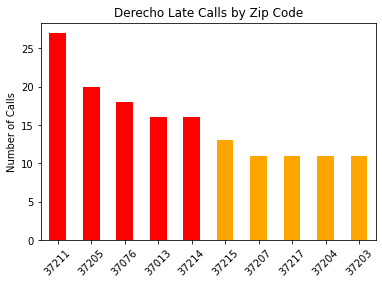

In [32]:
#ax=dcadd_zipcount.plot.bar(x='zip', color = 'orange')
#plt.title('Derecho Late Calls by Zip Code')
#plt.ylabel('Number of Calls');

ax=dcadd_zipcount.plot.bar(x='zip', color=['red', 'red','red','red','red',
                                           'orange','orange','orange','orange','orange']); 
plt.title('Derecho Late Calls by Zip Code')
plt.ylabel('Number of Calls')
plt.xticks(rotation = 45);